# Design Prototype of VectorField Class

This is the design and prototyping of a class to hold vector fields. The class should hold each component while ensuring that the data is proeprly formatted. Currently, only numpy arrays to xarray dataset are being investigated, but conversions from xarray DataArray to a VectorField class seems like another feature that would be nice to support. Finally, only gridded data will be supported for the VectorField class unless noted otherwise.

## Requirements:
Hold the following components:
 - x
 - y
 - u
 - v
 - s2n
 - flag

Hold the following metadata:
 - frame number
 - units for each component

More requirements would be added as necessary.

### Imports

In [73]:
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
from openpiv import tools

### Functions

In [38]:
def unsorted_unique(arr: np.ndarray):
    arr1, c = np.unique(arr, return_index=True)
    out = arr1[c.argsort()]
    return out, c

In [39]:
def create_sample_field(
    rows: int = 5,
    cols: int = 8,
    grid: list = None,
    frame: int = 0,
    noise_sigma: float = 1.0,
) -> xr.Dataset:
    """Borrowed from pivpy"""
    
    if grid is None:
        grid = [16, 8]

    x = np.arange(grid[0], (cols + 1) * grid[0], grid[0])
    y = np.arange(grid[1], (rows + 1) * grid[1], grid[1])

    xm, ym = np.meshgrid(x, y)
    u = (
        np.ones_like(xm)
        + np.linspace(0.0, 10.0, cols)
        + noise_sigma * np.random.randn(1, cols)
    )
    v = (
        np.zeros_like(ym)
        + np.linspace(-1.0, 1.0, rows).reshape(rows, 1)
        + noise_sigma * np.random.randn(rows, 1)
    )

    return xm, ym, u, v

### Initial prototype class

In [40]:
from vector_field import VectorField

In [41]:
field_size = (32, 48)

In [42]:
x_o, y_o, u_o, v_o = create_sample_field(field_size[0], field_size[1])

In [43]:
vf = VectorField(x_o, y_o, u_o, v_o)
vf

In [44]:
ds = vf.get_dataset()

In [45]:
x_n, y_n = vf.get_meshgrid()

assert x_n.all() == x_o.all()
assert y_n.all() == y_o.all() 

### Manipulate some data (not recommended for individual vector fields)
Note: All mutations are in-place (e.g., no copy of VectorField is made)

In [46]:
vf.get_u()[:5, 0]

<xarray.DataArray 'u' (y: 5, t: 1)> Size: 40B
array([[1.27298502],
       [1.27298502],
       [1.27298502],
       [1.27298502],
       [1.27298502]])
Coordinates:
  * t        (t) int32 4B 0
    x        float64 8B 16.0
  * y        (y) float64 40B 8.0 16.0 24.0 32.0 40.0
Attributes:
    units:    px/dt

In [47]:
vf += 1
vf.get_u()[:5, 0]

<xarray.DataArray 'u' (y: 5, t: 1)> Size: 40B
array([[2.27298502],
       [2.27298502],
       [2.27298502],
       [2.27298502],
       [2.27298502]])
Coordinates:
  * t        (t) int32 4B 0
    x        float64 8B 16.0
  * y        (y) float64 40B 8.0 16.0 24.0 32.0 40.0

In [48]:
vf *= 2
vf.get_u()[:5, 0]

<xarray.DataArray 'u' (y: 5, t: 1)> Size: 40B
array([[4.54597004],
       [4.54597004],
       [4.54597004],
       [4.54597004],
       [4.54597004]])
Coordinates:
  * t        (t) int32 4B 0
    x        float64 8B 16.0
  * y        (y) float64 40B 8.0 16.0 24.0 32.0 40.0

In [49]:
vf = vf / 0.5
vf.get_u()[:5, 0]

<xarray.DataArray 'u' (y: 5, t: 1)> Size: 40B
array([[9.09194008],
       [9.09194008],
       [9.09194008],
       [9.09194008],
       [9.09194008]])
Coordinates:
  * t        (t) int32 4B 0
    x        float64 8B 16.0
  * y        (y) float64 40B 8.0 16.0 24.0 32.0 40.0

### Get subpixel statistics

In [50]:
u_loc, v_loc = vf.get_subpixel_offset()

In [51]:
u_loc[:5, 0]

<xarray.DataArray 'u' (y: 5, t: 1)> Size: 40B
array([[0.09194008],
       [0.09194008],
       [0.09194008],
       [0.09194008],
       [0.09194008]])
Coordinates:
  * t        (t) int32 4B 0
    x        float64 8B 16.0
  * y        (y) float64 40B 8.0 16.0 24.0 32.0 40.0

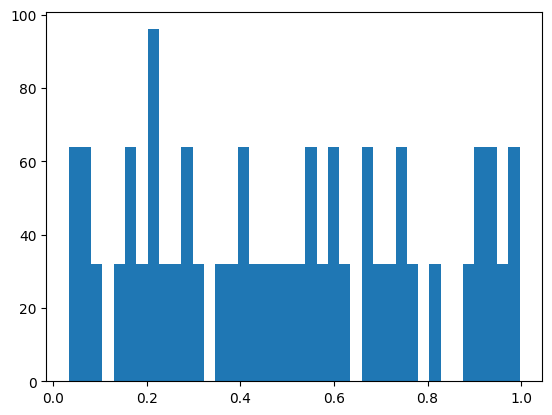

In [52]:
plt.hist(u_loc.data.flatten(), bins=40)
plt.show()

### Comparison

In [53]:
vf == vf

True

In [54]:
vf != vf

False

In [55]:
# make a deep copy
vf2 = vf.copy(deep=True)

In [56]:
vf == vf2

True

In [57]:
vf2 += 1

In [58]:
vf == vf2

False

In [59]:
vf.get_u()[:5, 0]

<xarray.DataArray 'u' (y: 5, t: 1)> Size: 40B
array([[9.09194008],
       [9.09194008],
       [9.09194008],
       [9.09194008],
       [9.09194008]])
Coordinates:
  * t        (t) int32 4B 0
    x        float64 8B 16.0
  * y        (y) float64 40B 8.0 16.0 24.0 32.0 40.0

In [60]:
vf2.get_u()[:5, 0]

<xarray.DataArray 'u' (y: 5, t: 1)> Size: 40B
array([[10.09194008],
       [10.09194008],
       [10.09194008],
       [10.09194008],
       [10.09194008]])
Coordinates:
  * t        (t) int32 4B 0
    x        float64 8B 16.0
  * y        (y) float64 40B 8.0 16.0 24.0 32.0 40.0

### Extend VectorField

In [61]:
num_fields = 1000
example_dataset = []
for frame_ind in range(1, num_fields):
    x_o, y_o, u_o, v_o = create_sample_field(field_size[0], field_size[1])
    
    new_vf = VectorField(x_o, y_o, u_o, v_o, frame=frame_ind)
    example_dataset.append(new_vf)

len(example_dataset)

999

In [62]:
example_dataset[0].get_dataset()

<xarray.Dataset> Size: 50kB
Dimensions:  (t: 1, y: 32, x: 48)
Coordinates:
  * t        (t) int32 4B 1
  * x        (x) float64 384B 16.0 32.0 48.0 64.0 ... 720.0 736.0 752.0 768.0
  * y        (y) float64 256B 8.0 16.0 24.0 32.0 ... 232.0 240.0 248.0 256.0
Data variables:
    u        (y, x, t) float64 12kB 1.699 0.1976 2.003 1.896 ... 11.8 9.743 12.6
    v        (y, x, t) float64 12kB -2.035 -2.035 -2.035 ... 1.453 1.453 1.453
    s2n      (y, x, t) float64 12kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    flag     (y, x, t) float64 12kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    dtype:    float64

In [63]:
vf.extend(example_dataset)

In [64]:
ds = vf.get_dataset()
ds

<xarray.Dataset> Size: 49MB
Dimensions:  (y: 32, x: 48, t: 1000)
Coordinates:
  * t        (t) int32 4kB 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * x        (x) float64 384B 16.0 32.0 48.0 64.0 ... 720.0 736.0 752.0 768.0
  * y        (y) float64 256B 8.0 16.0 24.0 32.0 ... 232.0 240.0 248.0 256.0
Data variables:
    u        (y, x, t) float64 12MB 9.092 1.699 1.565 1.092 ... 10.1 12.39 9.363
    v        (y, x, t) float64 12MB -1.609 -2.035 0.2343 ... 1.163 0.5796 0.2378
    s2n      (y, x, t) float64 12MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    flag     (y, x, t) float64 12MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    dtype:    float64

In [65]:
ds.t.data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [66]:
ds.isel(t=0)

<xarray.Dataset> Size: 50kB
Dimensions:  (y: 32, x: 48)
Coordinates:
    t        int32 4B 0
  * x        (x) float64 384B 16.0 32.0 48.0 64.0 ... 720.0 736.0 752.0 768.0
  * y        (y) float64 256B 8.0 16.0 24.0 32.0 ... 232.0 240.0 248.0 256.0
Data variables:
    u        (y, x) float64 12kB 9.092 4.997 10.56 11.75 ... 41.96 51.14 43.07
    v        (y, x) float64 12kB -1.609 -1.609 -1.609 ... 14.65 14.65 14.65
    s2n      (y, x) float64 12kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    flag     (y, x) float64 12kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    dtype:    float64

In [67]:
ds.isel(t=-1)

<xarray.Dataset> Size: 50kB
Dimensions:  (y: 32, x: 48)
Coordinates:
    t        int32 4B 999
  * x        (x) float64 384B 16.0 32.0 48.0 64.0 ... 720.0 736.0 752.0 768.0
  * y        (y) float64 256B 8.0 16.0 24.0 32.0 ... 232.0 240.0 248.0 256.0
Data variables:
    u        (y, x) float64 12kB 1.484 1.945 0.4897 0.5196 ... 9.715 12.78 9.363
    v        (y, x) float64 12kB -2.443 -2.443 -2.443 ... 0.2378 0.2378 0.2378
    s2n      (y, x) float64 12kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    flag     (y, x) float64 12kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    dtype:    float64

### Extend with duplicate time instances

In [74]:
# extend again to create duplicate entries
vf.extend(example_dataset)

ValueError: Duplicate time instances are not valid

### Some temporal statistics

In [69]:
u_loc, v_loc = vf.get_subpixel_offset()

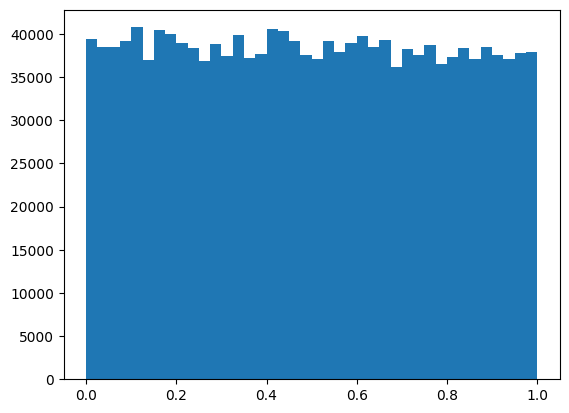

In [70]:
plt.hist(u_loc.data.flatten(), bins=40)
plt.show()

(array([2.7597e+04, 7.5522e+04, 4.0734e+04, 3.3000e+01, 2.7000e+01,
        1.8000e+01, 2.7000e+01, 1.8000e+01, 1.8000e+01, 6.0000e+00]),
 array([-2.51894466,  2.84735272,  8.2136501 , 13.57994748, 18.94624486,
        24.31254224, 29.67883962, 35.045137  , 40.41143438, 45.77773176,
        51.14402914]),
 <BarContainer object of 10 artists>)

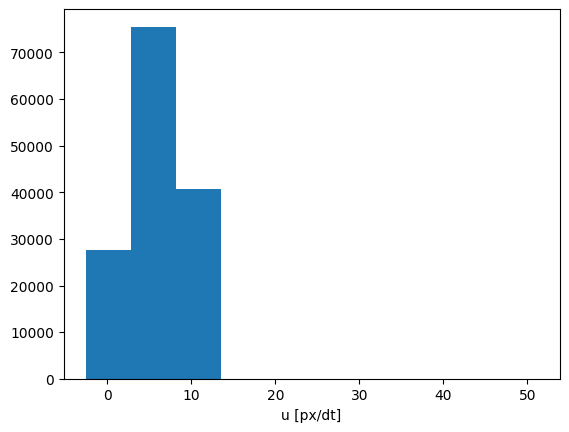

In [71]:
ds.where(
    (ds.y > 32) & (ds.y < 64),
    drop=True
).u.plot()

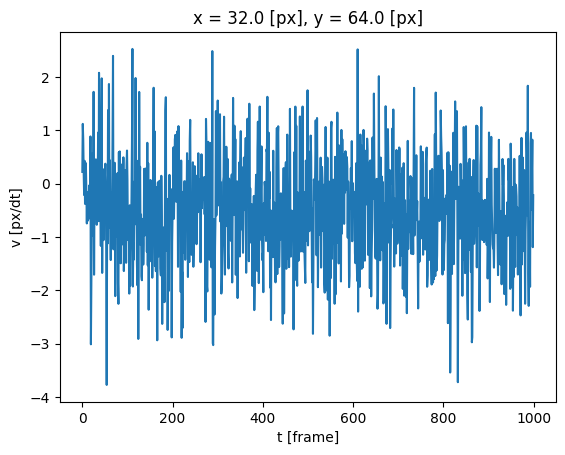

In [72]:
ds.where(
    (ds.y == 64) & (ds.x == 32),
    drop=True
).v.plot()

### Write time test